In [127]:
#import the libraries
import pymongo
from pymongo import MongoClient
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
import numpy as np
from sklearn.neighbors import KNeighborsClassifier


In [128]:
#establish the collection
connection = MongoClient('localhost', 27017)
db = connection.HeartAttack

In [129]:
data = db.HeartAttack
Heartattacklist=data.find()

In [130]:
cursor = data.find()
entries = list(cursor)
entries[:5]


[{'_id': ObjectId('642e095c157766178792a71c'),
  'age': 63,
  'sex': 1,
  'cp': 3,
  'trestbps': 145,
  'chol': 233,
  'fbs': 1,
  'restecg': 0,
  'thalach': 150,
  'exang': 0,
  'oldpeak': 2,
  'slope': 0,
  'ca': 0,
  'thal': 1,
  'target': 1},
 {'_id': ObjectId('642e095c157766178792a71d'),
  'age': 37,
  'sex': 1,
  'cp': 2,
  'trestbps': 130,
  'chol': 250,
  'fbs': 0,
  'restecg': 1,
  'thalach': 187,
  'exang': 0,
  'oldpeak': 3,
  'slope': 0,
  'ca': 0,
  'thal': 2,
  'target': 1},
 {'_id': ObjectId('642e095c157766178792a71e'),
  'age': 41,
  'sex': 0,
  'cp': 1,
  'trestbps': 130,
  'chol': 204,
  'fbs': 0,
  'restecg': 0,
  'thalach': 172,
  'exang': 0,
  'oldpeak': 1,
  'slope': 2,
  'ca': 0,
  'thal': 2,
  'target': 1},
 {'_id': ObjectId('642e095c157766178792a71f'),
  'age': 56,
  'sex': 1,
  'cp': 1,
  'trestbps': 120,
  'chol': 236,
  'fbs': 0,
  'restecg': 1,
  'thalach': 178,
  'exang': 0,
  'oldpeak': 0,
  'slope': 2,
  'ca': 0,
  'thal': 2,
  'target': 1},
 {'_id': Obj

In [131]:
df = pd.DataFrame(entries)
df.head()


,_id,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,642e095c157766178792a71c,63,1,3,145,233,1,0,150,0,2,0,0,1,1
1,642e095c157766178792a71d,37,1,2,130,250,0,1,187,0,3,0,0,2,1
2,642e095c157766178792a71e,41,0,1,130,204,0,0,172,0,1,2,0,2,1
3,642e095c157766178792a71f,56,1,1,120,236,0,1,178,0,0,2,0,2,1
4,642e095c157766178792a720,57,0,0,120,354,0,1,163,1,0,2,0,2,1


In [132]:
df = df.loc[:, df.columns != '_id']

<Axes: xlabel='target'>

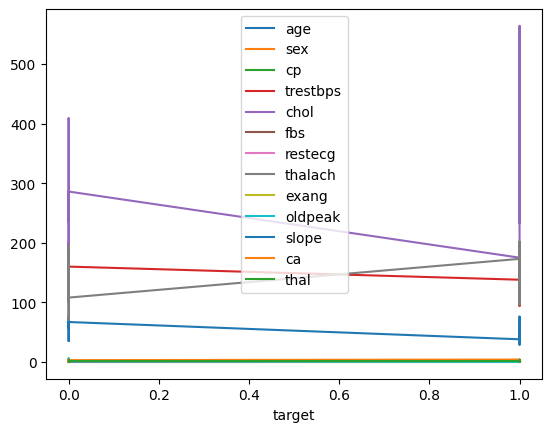

In [133]:
df.plot('target')

In [134]:
df.isnull()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,False,False,False,False,False,False,False,False,False,False,False,False,False,False
299,False,False,False,False,False,False,False,False,False,False,False,False,False,False
300,False,False,False,False,False,False,False,False,False,False,False,False,False,False
301,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [135]:
df.isna()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,False,False,False,False,False,False,False,False,False,False,False,False,False,False
299,False,False,False,False,False,False,False,False,False,False,False,False,False,False
300,False,False,False,False,False,False,False,False,False,False,False,False,False,False
301,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [136]:
df.isna().any()

age         False
sex         False
cp          False
trestbps    False
chol        False
fbs         False
restecg     False
thalach     False
exang       False
oldpeak     False
slope       False
ca          False
thal        False
target      False
dtype: bool

In [137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   age       303 non-null    int64
 1   sex       303 non-null    int64
 2   cp        303 non-null    int64
 3   trestbps  303 non-null    int64
 4   chol      303 non-null    int64
 5   fbs       303 non-null    int64
 6   restecg   303 non-null    int64
 7   thalach   303 non-null    int64
 8   exang     303 non-null    int64
 9   oldpeak   303 non-null    int64
 10  slope     303 non-null    int64
 11  ca        303 non-null    int64
 12  thal      303 non-null    int64
 13  target    303 non-null    int64
dtypes: int64(14)
memory usage: 33.3 KB


In [138]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,0.765677,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.070933,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.000000,2.000000,4.000000,3.000000,1.000000


<Axes: >

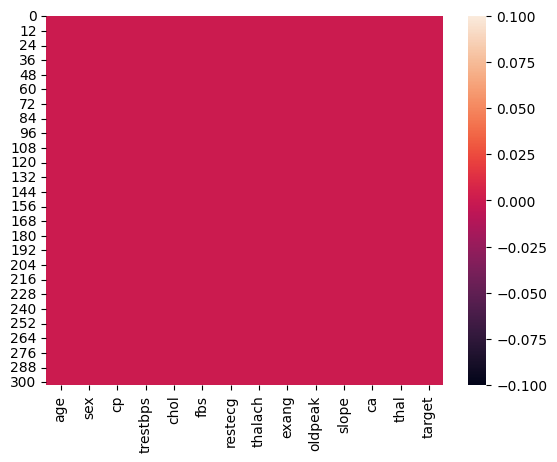

In [139]:
sns.heatmap(df.isnull())

In [140]:
correlation = df.corr()
print(correlation)

               age       sex        cp  trestbps      chol       fbs  \
age       1.000000 -0.098447 -0.068653  0.279351  0.213678  0.121308   
sex      -0.098447  1.000000 -0.049353 -0.056769 -0.197912  0.045032   
cp       -0.068653 -0.049353  1.000000  0.047608 -0.076904  0.094444   
trestbps  0.279351 -0.056769  0.047608  1.000000  0.123174  0.177531   
chol      0.213678 -0.197912 -0.076904  0.123174  1.000000  0.013294   
fbs       0.121308  0.045032  0.094444  0.177531  0.013294  1.000000   
restecg  -0.116211 -0.058196  0.044421 -0.114103 -0.151040 -0.084189   
thalach  -0.398522 -0.044020  0.295762 -0.046698 -0.009940 -0.008567   
exang     0.096801  0.141664 -0.394280  0.067616  0.067023  0.025665   
oldpeak   0.178396  0.089604 -0.180783  0.190276  0.035479  0.022088   
slope    -0.168814 -0.030711  0.119717 -0.121475 -0.004038 -0.059894   
ca        0.276326  0.118261 -0.181053  0.101389  0.070511  0.137979   
thal      0.068001  0.210041 -0.161736  0.062210  0.098803 -0.03

<Axes: >

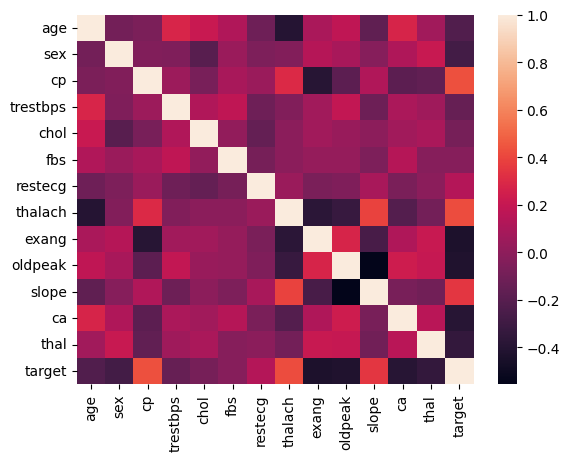

In [141]:
sns.heatmap(correlation)

In [142]:
X = df.drop("target", axis = 1)
Y = df['target']
Y

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
207,60,0,0,150,258,0,0,157,0,2,1,2,3
97,52,1,0,108,233,1,1,147,0,0,2,3,3
174,60,1,0,130,206,0,0,132,1,2,1,2,3
115,37,0,2,120,215,0,1,170,0,0,2,0,2
202,58,1,0,150,270,0,0,111,1,0,2,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,55,0,1,135,250,0,0,161,0,1,1,0,2
246,56,0,0,134,409,0,0,150,1,1,1,2,3
277,57,1,1,124,261,0,1,141,0,0,2,0,3
68,44,1,1,120,220,0,1,170,0,0,2,0,2


In [146]:
Y_train

207    0
97     1
174    0
115    1
202    0
      ..
75     1
246    0
277    0
68     1
191    0
Name: target, Length: 242, dtype: int64

In [148]:
# Putting modeld in a dictionary
models={"Logistic Regression": LogisticRegression(),
       "KNM": KNeighborsClassifier(),
       "Random Forest" : RandomForestClassifier()}

#Create a function to fit and score models
def fit_and_score(models,X_train,X_test,Y_train,Y_test):
    '''
    Fits and evaluates the given machine learning models.
    models: a dict of different SciKit Learn machine learning models
    x_train: training data (no lables)
    x_test: testing data (no labels)
    y_train : training labels
    y_test : test labels
    '''
    
    #Make a dictionary to keep model scores
    model_scores ={}
    #Loop through models
    for name, model in models.items():
        #Fit the model to the data
        model.fit(X_train,Y_train)
        #Evaluate the model and append its score to model_score
        model_scores[name]= model.score(X_test,Y_test)
    return  model_scores

In [144]:
model_scores=fit_and_score(models=models,
                          X_train=X_train,
                           X_test=X_test,
                           Y_train= Y_train,
                           Y_test= Y_test
                          )
model_scores

c:\Users\sweek\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442,
 'KNM': 0.639344262295082,
 'Random Forest': 0.8852459016393442}

In [145]:
prediction = models["Random Forest"].predict(X_test)
print(prediction)

[1 1 0 0 0 1 1 0 1 0 0 1 0 1 1 1 1 0 0 0 0 0 0 1 1 0 1 1 1 1 0 0 0 1 1 1 1
 1 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 0 0 0 0 0 1 1]
